In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [100]:
liquidity_data = pd.read_csv("C:\\Users\\roni2\\OneDrive\\Documents\\WSO - Python Fundementals\\Applied ML\\liquidity_data.csv")

In [102]:
liquidity_data.head(3)

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0


In [104]:
liquidity_data.describe()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
count,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,3884.952199,3.017456,41645.089870,9040.720589,-1200.91799,3455.752891,1772.335973,20420.383638
std,4267.893247,1.851461,74046.522440,12112.161513,2066.29159,5679.466199,4207.345101,39483.422972
min,267.000000,0.000000,4282.810112,0.000000,-15858.00000,-6530.000000,-4888.000000,503.586000
25%,1288.328992,2.000000,10082.091010,2125.297000,-1241.00000,936.200000,232.923000,3791.525000
50%,2395.700000,3.000000,19349.403650,4562.000000,-512.00000,1695.700032,682.110000,8587.166000
75%,4512.458596,4.000000,41154.826240,10478.000000,-190.00000,3706.000000,1788.000000,18816.000000
max,28694.042710,10.000000,777070.706700,87032.000000,-5.04900,69715.000320,53244.000000,487511.000000


In [106]:
from sklearn.model_selection import train_test_split

In [108]:
target = liquidity_data.available_liquidity

inputs = liquidity_data.drop('available_liquidity', axis = 1)

In [110]:
target.head(1)

0    28694.04271
Name: available_liquidity, dtype: float64

In [112]:
inputs.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0


In [114]:
results = train_test_split(inputs, target, test_size = 0.2, random_state=1)

In [116]:
print(type(results))
print(len(results))
print('---')
for item in results:
    print(item.shape)

<class 'list'>
4
---
(641, 7)
(161, 7)
(641,)
(161,)


In [118]:
input_train, input_test, target_train, target_test = results

print (input_train.shape)
print (input_test.shape)
print (target_train.shape)
print (target_test.shape)

(641, 7)
(161, 7)
(641,)
(161,)


In [120]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=1))
}

In [122]:
from sklearn.linear_model import ElasticNet

pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=1))

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1))


In [126]:
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [128]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

In [130]:
ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [132]:
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : [None, 0.3, 0.6]
}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

In [134]:
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [136]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print(key, 'was found, and it is a grid')
        else:
            print(key, 'was found, but it is not a grid')
    else:
        print(key, 'was not found')

enet was found, and it is a grid
gb was found, and it is a grid
ridge was found, and it is a grid
rf was found, and it is a grid
lasso was found, and it is a grid


In [138]:
from sklearn.model_selection import GridSearchCV

untrained_lasso_model = GridSearchCV(pipelines['lasso'], hyperparameter_grids['lasso'], cv = 5)

In [140]:
print(pipelines.keys())
print(hyperparameter_grids.keys())

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])
dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])


In [142]:
models = {}

for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)

models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [144]:
models['lasso'].fit(input_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=1))]),
             param_grid={'lasso__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5]})

In [146]:
for key in models.keys():
    models[key].fit(input_train, target_train)
    print(key,'is trained and tuned')

lasso is trained and tuned
ridge is trained and tuned
enet is trained and tuned
rf is trained and tuned
gb is trained and tuned


In [92]:
from sklearn.metrics import r2_score, mean_absolute_error

In [94]:
lasso_preds = models['lasso'].predict(input_test)
print('R-Squared: ', round(r2_score(target_test, lasso_preds), 3))
print('MAE: ', round(mean_absolute_error(target_test, lasso_preds), 3))

R-Squared:  0.498
MAE:  1710.083


In [96]:
for trained_model in models.keys():
    preds = models[trained_model].predict(input_test)
    print(trained_model)
    print('R-Squared: ', round(r2_score(target_test, preds), 3))
    print('MAE: ', round(mean_absolute_error(target_test, preds), 3))
    print('---')

lasso
R-Squared:  0.498
MAE:  1710.083
---
ridge
R-Squared:  0.5
MAE:  1708.062
---
enet
R-Squared:  0.501
MAE:  1706.04
---
rf
R-Squared:  0.851
MAE:  955.744
---
gb
R-Squared:  0.842
MAE:  613.546
---


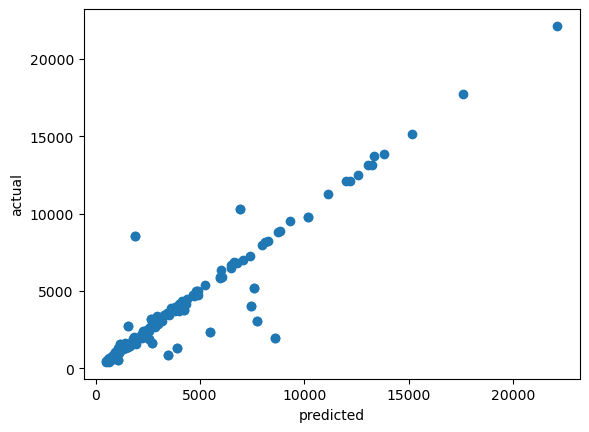

In [413]:
preds = models['gb'].predict(input_test)

plt.scatter(preds, target_test)

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [415]:
client = pd.read_csv("C:\\Users\\roni2\\OneDrive\\Documents\\WSO - Python Fundementals\\Applied ML\\liquidity_client.csv")
models['gb'].predict(client)
                     

array([28662.93733727])